In [268]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#Scikit Learn Imports
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

df = pd.read_csv('data_input.csv', 
                usecols=['wellName', 'MD', 'DTP', 'GK_API', 'RHOB'], dtype={'wellName': str})

df.info

C:\Users\sgnik\AppData\Local\Temp\ipykernel_23052\1053214199.py:10: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data_input.csv',


<bound method DataFrame.info of        wellName      MD     DTP  GK_API    RHOB
0           NaN       m    US/M    gAPI   g/cm3
1           246       0   -9999   -9999   -9999
2           246     0.1   -9999   -9999   -9999
3           246     0.2   -9999   -9999   -9999
4           246     0.3   -9999   -9999   -9999
...         ...     ...     ...     ...     ...
211532     5175  3549.6 -9999.0 -9999.0 -9999.0
211533     5175  3549.7 -9999.0 -9999.0 -9999.0
211534     5175  3549.8 -9999.0 -9999.0 -9999.0
211535     5175  3549.9 -9999.0 -9999.0 -9999.0
211536     5175  3550.0 -9999.0 -9999.0 -9999.0

[211537 rows x 5 columns]>

In [269]:
df[['MD', 'DTP', 'GK_API', 'RHOB']] = df[['MD', 'DTP', 'GK_API', 'RHOB']].apply(pd.to_numeric, errors='coerce')
df.replace([-9999, 0], np.nan, inplace=True)
df.info

<bound method DataFrame.info of        wellName      MD  DTP  GK_API  RHOB
0           NaN     NaN  NaN     NaN   NaN
1           246     NaN  NaN     NaN   NaN
2           246     0.1  NaN     NaN   NaN
3           246     0.2  NaN     NaN   NaN
4           246     0.3  NaN     NaN   NaN
...         ...     ...  ...     ...   ...
211532     5175  3549.6  NaN     NaN   NaN
211533     5175  3549.7  NaN     NaN   NaN
211534     5175  3549.8  NaN     NaN   NaN
211535     5175  3549.9  NaN     NaN   NaN
211536     5175  3550.0  NaN     NaN   NaN

[211537 rows x 5 columns]>

In [270]:
df = df.dropna()
df.info

<bound method DataFrame.info of        wellName      MD      DTP     GK_API   RHOB
26921       246  2692.0  257.710  105.31080  2.355
26922       246  2692.1  248.527   96.32419  2.347
26923       246  2692.2  243.160   86.19194  2.344
26924       246  2692.3  242.634   77.65507  2.354
26925       246  2692.4  244.468   73.43754  2.382
...         ...     ...      ...        ...    ...
211201     5175  3516.5  289.340  153.81830  2.560
211202     5175  3516.6  291.220  156.10980  2.550
211203     5175  3516.7  291.850  156.77820  2.540
211204     5175  3516.8  290.250  155.63240  2.530
211205     5175  3516.9  287.640  153.05440  2.520

[32312 rows x 5 columns]>

In [271]:
feature_names = df.columns
df.describe()

,MD,DTP,GK_API,RHOB
count,32312.000000,32312.000000,32312.000000,32312.000000
mean,2808.655462,259.301984,82.937754,2.411768
std,498.519390,34.212993,16.746777,0.121509
min,1668.000000,138.930000,23.392600,1.220000
25%,2475.775000,238.559500,71.037120,2.350000
50%,2924.200000,252.915000,82.364770,2.424000
75%,3187.800000,276.520000,93.570400,2.490000
max,3592.000000,463.340000,186.854400,2.711000


In [272]:
# Training Wells
training_wells = ['4303', '4233', '246', '249', '5175'] 

# Test Well
test_well = ['4195']

# Create training and testing dataframes
train_val_df = df[df['wellName'].isin(training_wells)].copy()
test_df = df[df['wellName'].isin(test_well)].copy()
train_val_df.describe()


,MD,DTP,GK_API,RHOB
count,29871.000000,29871.000000,29871.000000,29871.000000
mean,2799.278762,260.923359,82.902261,2.409834
std,516.973209,34.832675,17.100040,0.123904
min,1668.000000,138.930000,23.392600,1.220000
25%,2414.750000,239.706750,70.594740,2.350000
50%,2924.500000,254.960000,82.117140,2.420000
75%,3208.100000,278.945000,93.860045,2.490000
max,3592.000000,463.340000,186.854400,2.710000


In [273]:
test_df.describe()

,MD,DTP,GK_API,RHOB
count,2441.000000,2441.000000,2441.000000,2441.000000
mean,2923.400000,239.460888,83.372088,2.435436
std,70.480033,14.873225,11.575510,0.083495
min,2801.400000,173.708000,42.448180,2.158000
25%,2862.400000,232.261000,76.491140,2.393000
50%,2923.400000,239.516500,83.864050,2.444000
75%,2984.400000,245.507000,91.567310,2.486000
max,3045.400000,310.050000,118.030900,2.711000


In [274]:
# Setup the columns for training and target features
X = train_val_df[['GK_API', 'RHOB']]
y = train_val_df['DTP']

# Split the data into training and validation datasets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [275]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.values)
scaled_df = pd.DataFrame(scaled_data, columns=feature_names)
#Fit the StandardScaler to the training data
X_train = scaler.fit_transform(X_train)

# Apply the StandardScaler, but not fit, to the validation data
X_val = scaler.transform(X_val)

In [276]:
model = MLPRegressor(hidden_layer_sizes=(64, 64,64), 
                     activation="relu" ,
                     random_state=42, max_iter=2000)
model.fit(X_train, y_train)

#Predict on the validation data
y_pred = model.predict(X_val)

In [277]:
mae = metrics.mean_absolute_error(y_val, y_pred)

mse = metrics.mean_squared_error(y_val, y_pred)
rmse = mse**0.5 

r2 = metrics.r2_score(y_val, y_pred)

print(f"""
MAE: \t{mae:.2f}
RMSE: \t{rmse:.2f}
r2: \t{r2:.2f}
""")


MAE: 	16.36
RMSE: 	21.86
r2: 	0.60



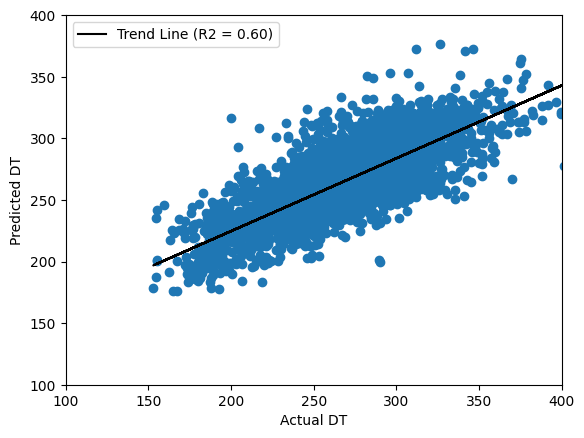

In [278]:
plt.scatter(y_val, y_pred)
plt.xlim(100, 400)
plt.ylim(100, 400)
plt.ylabel('Predicted DT')
plt.xlabel('Actual DT')

coefficients = np.polyfit(y_val, y_pred, 1)
polynomial = np.poly1d(coefficients)
trend_line = polynomial(y_val)
r2 = metrics.r2_score(y_val, y_pred)

plt.plot(y_val, trend_line, 'black', label=f'Trend Line (R2 = {r2:.2f})') #1 to 1 line
plt.legend()
plt.show()

In [279]:
#blind testing

test_well_x = test_df[['GK_API', 'RHOB']]

test_well_x = scaler.transform(test_well_x)

test_df['TEST_DT'] = model.predict(test_well_x)

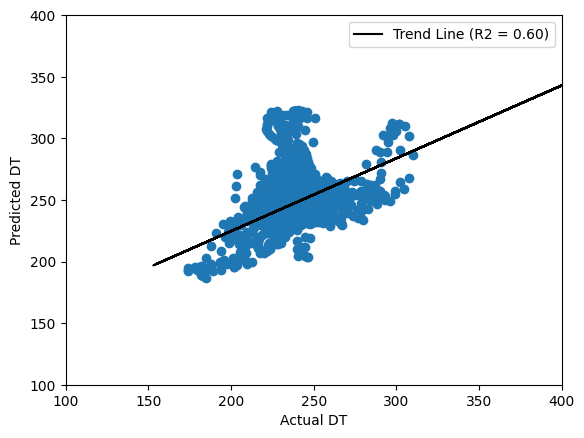

In [280]:
plt.scatter(test_df['DTP'], test_df['TEST_DT'])
plt.xlim(100, 400)
plt.ylim(100, 400)
plt.ylabel('Predicted DT')
plt.xlabel('Actual DT')
coefficients = np.polyfit(y_val, y_pred, 1)
polynomial = np.poly1d(coefficients)
trend_line = polynomial(y_val)
r2 = metrics.r2_score(y_val, y_pred)

plt.plot(y_val, trend_line, 'black', label=f'Trend Line (R2 = {r2:.2f})') #1 to 1 line
plt.legend()
plt.show()

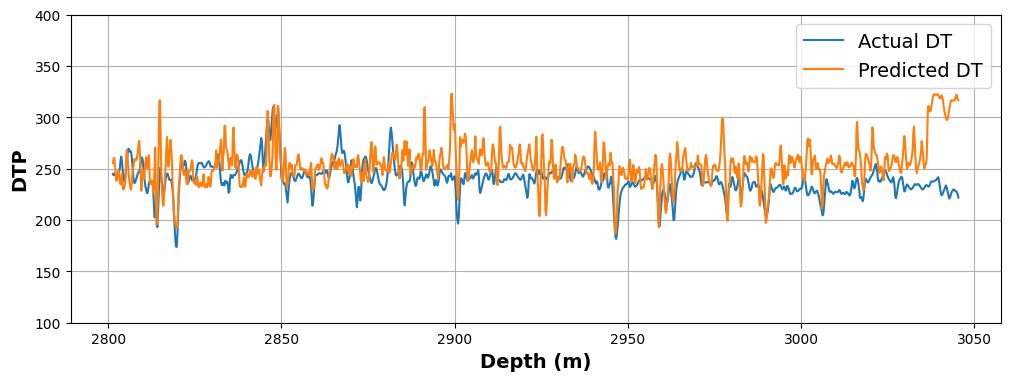

In [284]:
plt.figure(figsize=(12, 4))
plt.plot(test_df['MD'], test_df['DTP'], label='Actual DT')
plt.plot(test_df['MD'], test_df['TEST_DT'], label='Predicted DT')

plt.xlabel('Depth (m)', fontsize=14, fontweight='bold')
plt.ylabel('DTP', fontsize=14,fontweight='bold')

plt.ylim(100, 400)
plt.legend(fontsize=14)
plt.grid()